In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Load the dataset
df = pd.read_csv('index.csv')

In [8]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


# First few rows show
- date and datetime of each transaction
- cash_type: type of payment (card or cash)
- card: unique masked ID for card users (missing for cash)
- money: amount spent on the transaction
- coffee_name: type of coffee purchased

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


# Data Information (df.info())
- Total records: 1133
- Missing values: 89 missing in the card column
# Data types:
- date, datetime – object (to be converted to datetime)
- cash_type, card, coffee_name – object
- money – float64

In [10]:
df.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


- Indicates that coffee prices are fairly consistent, mostly between ₹28 and ₹38.
- The money column suggests standard coffee pricing across products.
- The card column has missing values for cash users, which can be handled logically in the next step.

In [11]:
# Rename columns for ease
df.columns = ['Date', 'DateTime', 'Cash_Type', 'Card', 'Money', 'Coffee_Name']
print(df.columns)

Index(['Date', 'DateTime', 'Cash_Type', 'Card', 'Money', 'Coffee_Name'], dtype='object')


In [12]:
# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1133 non-null   datetime64[ns]
 1   DateTime     1133 non-null   datetime64[ns]
 2   Cash_Type    1133 non-null   object        
 3   Card         1044 non-null   object        
 4   Money        1133 non-null   float64       
 5   Coffee_Name  1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 53.2+ KB


In [14]:
df[['Date', 'DateTime']].head()

,Date,DateTime
0,2024-03-01,2024-03-01 10:15:50.520
1,2024-03-01,2024-03-01 12:19:22.539
2,2024-03-01,2024-03-01 12:20:18.089
3,2024-03-01,2024-03-01 13:46:33.006
4,2024-03-01,2024-03-01 13:48:14.626


In [15]:
# Fill NaNs in 'card' with 'cash_user'
df['Card'] = df['Card'].fillna('Cash_user')

In [16]:
df['Card'].head()

0    ANON-0000-0000-0001
1    ANON-0000-0000-0002
2    ANON-0000-0000-0002
3    ANON-0000-0000-0003
4    ANON-0000-0000-0004
Name: Card, dtype: object

In [17]:
# Convert 'money' to numeric, errors='coerce' will turn non-numeric values into NaN
df['Money'] = pd.to_numeric(df['Money'], errors='coerce')
df['Money'].head(6)

0    38.7
1    38.7
2    38.7
3    28.9
4    38.7
5    33.8
Name: Money, dtype: float64

In [18]:
df['Month'] = df['Date'].dt.to_period('M').astype(str)
df['day_of_week'] = df['Date'].dt.day_name()
df['hour'] = df['DateTime'].dt.hour

df[['Month', 'day_of_week', 'hour']].head()



,Month,day_of_week,hour
0,2024-03,Friday,10
1,2024-03,Friday,12
2,2024-03,Friday,12
3,2024-03,Friday,13
4,2024-03,Friday,13


# Exploratory Data Analysis (EDA)


C:\Users\anshu kumari\AppData\Local\Temp\ipykernel_21484\3059978347.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coffee_sales, x='Money', y='Coffee_Name', palette='viridis')


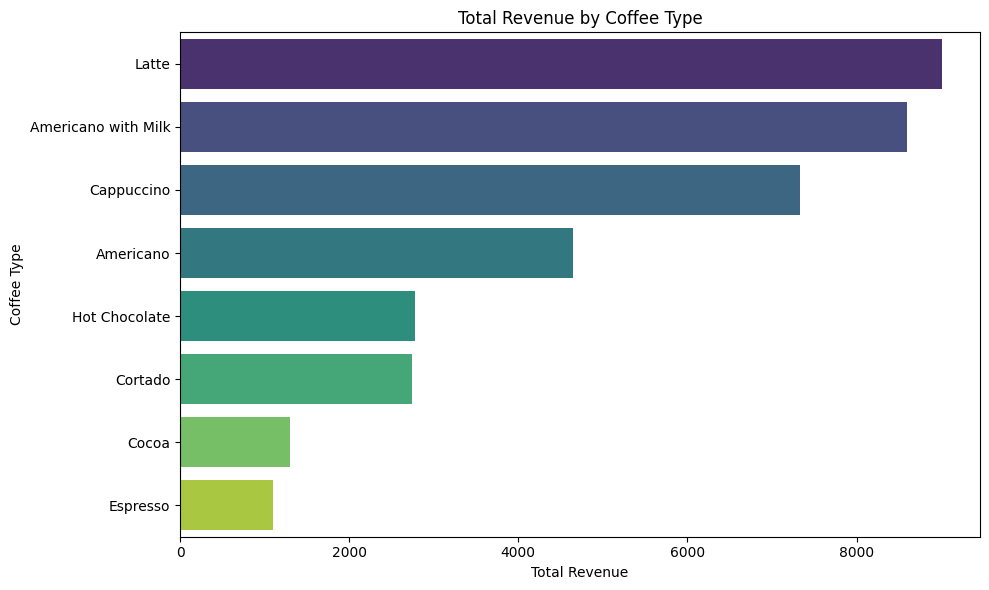

In [19]:
# Group by coffee type and sum the revenue
coffee_sales = df.groupby('Coffee_Name')['Money'].sum().sort_values(ascending=False)

# Reset index to turn Series into DataFrame for seaborn
coffee_sales = coffee_sales.reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=coffee_sales, x='Money', y='Coffee_Name', palette='viridis')
plt.title("Total Revenue by Coffee Type")
plt.xlabel("Total Revenue")
plt.ylabel("Coffee Type")
plt.tight_layout()
plt.show()


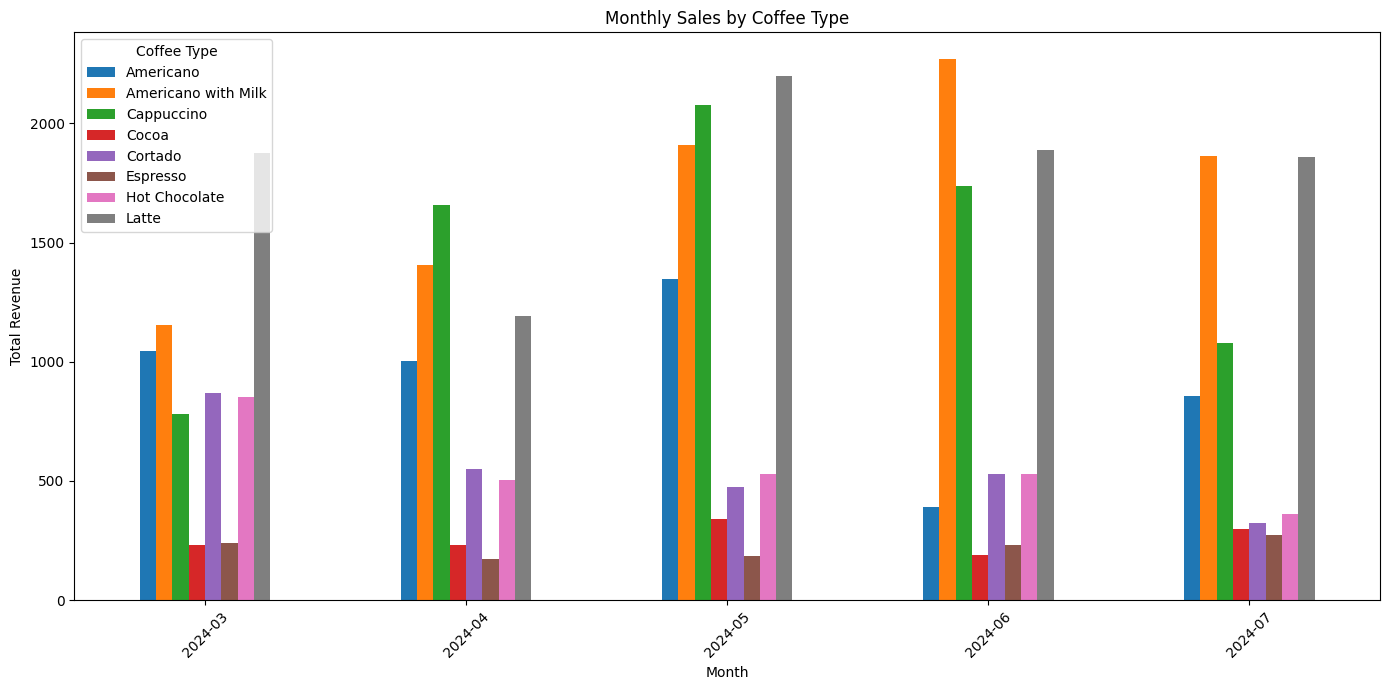

In [20]:
# Group and reshape the data
monthly_sales = df.groupby(['Month', 'Coffee_Name'])['Money'].sum().unstack()

# Plot as a bar chart
monthly_sales.plot(kind='bar', figsize=(14, 7))

plt.title('Monthly Sales by Coffee Type')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Coffee Type')
plt.tight_layout()
plt.show()


## 📈 Sales Forecasting with ARIMA (Next 30 Days)

To understand upcoming trends in coffee sales, we use ARIMA — a time series model for forecasting future values based on past patterns.


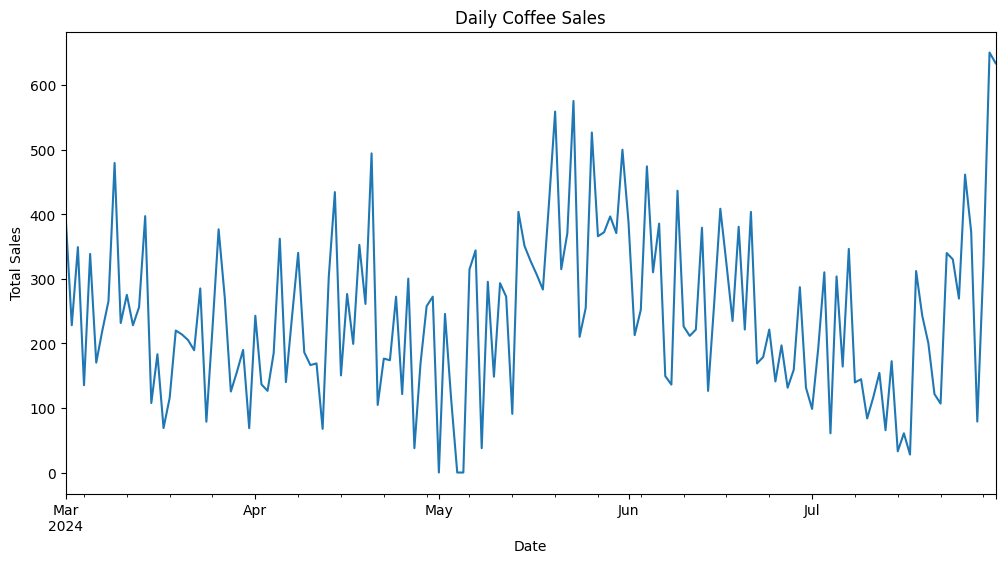

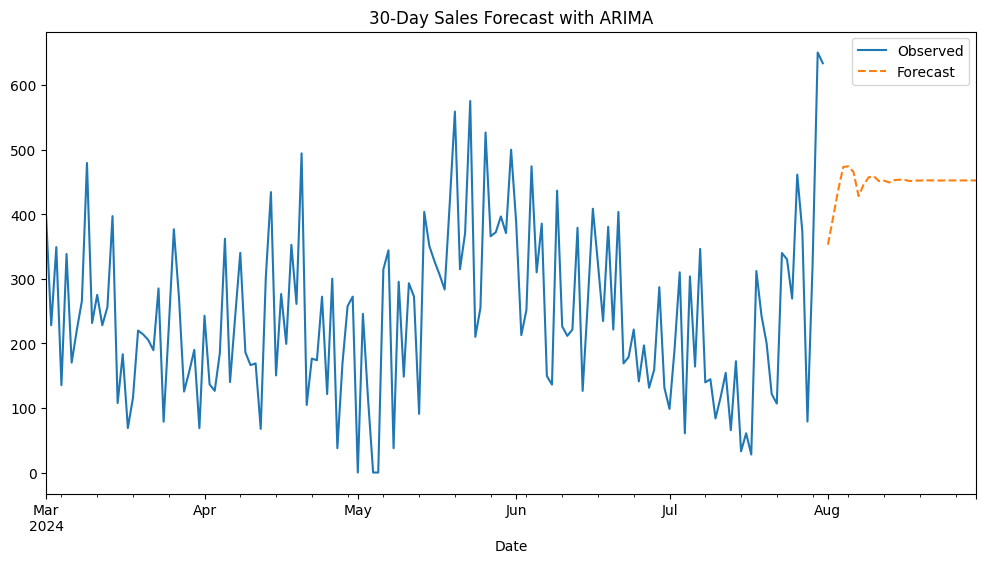

In [21]:
# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Aggregate total sales per day
daily_sales = df['Money'].resample('D').sum()

# Plot daily sales
daily_sales.plot(title='Daily Coffee Sales', figsize=(12,6))
plt.ylabel("Total Sales")
plt.show()

# Forecasting using ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model (p=5, d=1, q=0 as a start)
model = ARIMA(daily_sales, order=(5,1,0))
model_fit = model.fit()

# Predict next 30 days
forecast = model_fit.forecast(steps=30)

# Plot forecast
plt.figure(figsize=(12,6))
daily_sales.plot(label='Observed')
forecast.plot(label='Forecast', style='--')
plt.title('30-Day Sales Forecast with ARIMA')
plt.legend()
plt.show()


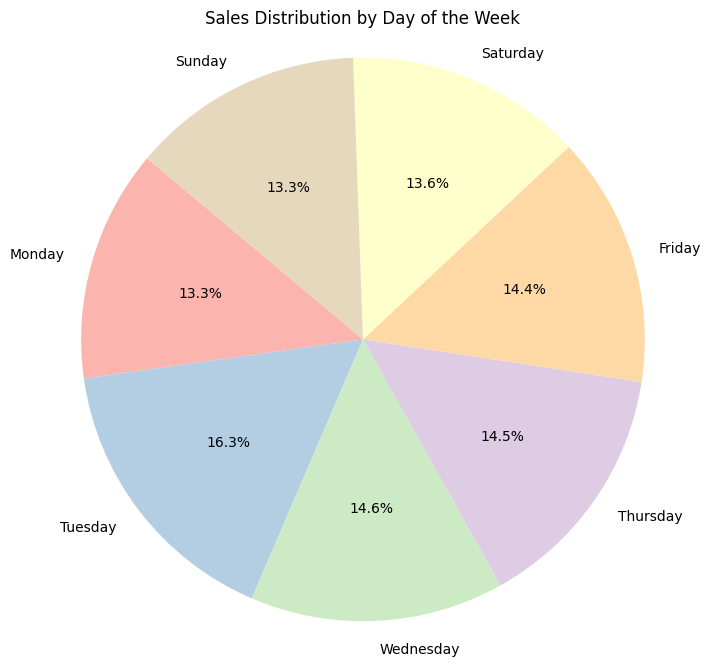

In [22]:
# Group by day of the week
day_counts = df['day_of_week'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

# Plot as pie chart
plt.figure(figsize=(8,8))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Sales Distribution by Day of the Week')
plt.axis('equal')
plt.show()



In [23]:
daily_sales = df.groupby('Date')['Money'].sum().reset_index()

# Convert to time series
daily_sales.set_index('Date', inplace=True)


In [24]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(daily_sales['Money'], order=(5,1,0))
model_fit = model.fit()

# Forecast next 7 days
forecast = model_fit.forecast(steps=7)
print(forecast)


150    355.669442
151    383.031537
152    432.569424
153    481.717607
154    481.049993
155    454.869475
156    426.167899
Name: predicted_mean, dtype: float64


c:\Users\anshu kumari\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\anshu kumari\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\anshu kumari\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\anshu kumari\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarnin

In [25]:
user_data = df[df['Card'] != 'cash_user']  # remove cash transactions
user_summary = user_data.groupby('Card')['Coffee_Name'].value_counts().unstack(fill_value=0)
user_summary.head()


Coffee_Name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
Card,,,,,,,,
ANON-0000-0000-0001,0,0,0,0,0,0,0,17
ANON-0000-0000-0002,0,0,0,0,0,0,2,0
ANON-0000-0000-0003,17,1,0,0,4,1,0,0
ANON-0000-0000-0004,4,4,0,0,0,0,0,1
ANON-0000-0000-0005,0,1,0,0,0,0,0,0


In [26]:
import sqlite3

conn = sqlite3.connect('coffee_sales.db')
df.to_sql('sales_data', conn, if_exists='replace', index=False)

# Example query
query = "SELECT coffee_name, SUM(money) as total_sales FROM sales_data GROUP BY coffee_name"
pd.read_sql_query(query, conn)


,Coffee_Name,total_sales
0,Americano,4644.54
1,Americano with Milk,8601.94
2,Cappuccino,7333.14
3,Cocoa,1295.94
4,Cortado,2745.08
5,Espresso,1100.62
6,Hot Chocolate,2778.48
7,Latte,9009.14


### 📊 Business Insights Summary

- Most coffee sales occur between **8 AM and 11 AM** on weekdays, indicating that customers prefer coffee during morning hours. This suggests an opportunity for **morning promotions and combo offers**.
- **Cappuccino** consistently ranks as the highest-selling item across months, making it a key product to highlight in marketing.
- Weekend sales are comparatively lower, which may point to reduced foot traffic — promotions or alternate product offerings could be tested.
- Consistent sales trends show demand stability, which helps in planning inventory and supply chain logistics more effectively.
